In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models

# Preprocessing

In [5]:
df= pd.read_csv('/content/drive/MyDrive/TIE_PROJECT/Tweets.csv', sep=',')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
print("Number of Rows: " + str(df.shape[0]))
print("Number of Columns: " + str(df.shape[1]))

Number of Rows: 14640
Number of Columns: 15


In [7]:
tweet_df = df[['text','airline_sentiment']]

In [8]:
tweet_df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [9]:
tweet_df = tweet_df[tweet_df['airline_sentiment'] != 'neutral']

In [10]:
X = tweet_df.text
y = tweet_df.airline_sentiment


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print("Training Set X Items: " + str(len(X_train)))
print("Training Set y Items: " + str(len(y_train)))

Training Set X Items: 9232
Training Set y Items: 9232


In [13]:
print("Test Set X Items: " + str(len(X_test)))
print("Test Set y Items: " + str(len(y_test)))

Test Set X Items: 2309
Test Set y Items: 2309


In [14]:
review_labels_train = y_train.factorize()

In [15]:
review_labels_train[0]

array([0, 0, 0, ..., 1, 0, 0])

In [16]:
review_labels_train[1]

Index(['negative', 'positive'], dtype='object')

In [17]:
vocab = X_train.values
vocab

array(['@USAirways Another dead end.  They only handle AA L&amp;F.  They gave me the same failed # I already had. 610-362-7498(99) VM full.  #lost',
       '@USAirways #2066. Was on plane from PBI to CLT and knew about the frozen water. Also saw a plane to NYC take off at the gate next door!',
       '@USAirways waiting for bags now over 25min in Phl bag claim!',
       ...,
       'Lovely! RT @JetBlue: Our fleet’s on fleek. http://t.co/Hi6Fl1AX9E',
       "@united Okay thanks if you could please update me. I was told at the airport someone would call me today but they haven't.",
       '@USAirways IS THIS RINGLING BROTHERS BARNUM AND BAILEY???  SHOULD I KEEP MY EYES PEELED FOR THE CLOWN CAR???'],
      dtype=object)

In [18]:
tokenizer = Tokenizer(num_words=8000,oov_token='OOV')
tokenizer.fit_on_texts(vocab)

vocab_size = len(tokenizer.word_index) + 1

print(tokenizer)
print(vocab_size)

11636


In [19]:
len(tokenizer.word_index)

11635

In [20]:
with open('tokenizer.pickle', 'wb') as handle:
  pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [21]:
tweet = X_train.values

tweet_seqs = tokenizer.texts_to_sequences(tweet)

padded_sequence_train = pad_sequences(tweet_seqs, maxlen=200)
print(padded_sequence_train)

[[   0    0    0 ... 3560  364  141]
 [   0    0    0 ...   76  196  754]
 [   0    0    0 ...  304   79  354]
 ...
 [   0    0    0 ...   48   50    1]
 [   0    0    0 ...   32   57  353]
 [   0    0    0 ...    3 4197  569]]


In [22]:
print(padded_sequence_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0   13  143 1590  549   57  122  660  221 2105
   59  752   57  428   20    3  257  855    4  224   81 5034 3559 5035
 2830 

In [23]:
embedding_vector_length = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length,
                                     input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           372352    
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 389003 (1.48 MB)
Trainable params: 389003 (1.48 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

# Train Model

In [24]:
trained = model.fit(padded_sequence_train,review_labels_train[0],
                  validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
231/231 [==============================] - 254s 1s/step - loss: 0.4180 - accuracy: 0.8255 - val_loss: 0.3103 - val_accuracy: 0.8771
Epoch 2/10
231/231 [==============================] - 263s 1s/step - loss: 0.2291 - accuracy: 0.9143 - val_loss: 0.2376 - val_accuracy: 0.9015
Epoch 3/10
231/231 [==============================] - 240s 1s/step - loss: 0.1564 - accuracy: 0.9403 - val_loss: 0.2514 - val_accuracy: 0.9069
Epoch 4/10
231/231 [==============================] - 233s 1s/step - loss: 0.1191 - accuracy: 0.9580 - val_loss: 0.2376 - val_accuracy: 0.9074
Epoch 5/10
231/231 [==============================] - 235s 1s/step - loss: 0.0932 - accuracy: 0.9675 - val_loss: 0.2342 - val_accuracy: 0.9096
Epoch 6/10
231/231 [==============================] - 232s 1s/step - loss: 0.0767 - accuracy: 0.9741 - val_loss: 0.2563 - val_accuracy: 0.9063
Epoch 7/10
231/231 [==============================] - 230s 999ms/step - loss: 0.0613 - accuracy: 0.9782 - val_loss: 0.3438 - val_accuracy: 0.9

In [25]:
encoded_docs = tokenizer.texts_to_sequences(X_test)
padded_sequence_test = pad_sequences(encoded_docs, maxlen=200)
print(padded_sequence_test)

[[   0    0    0 ...   10    1   18]
 [   0    0    0 ...   48   50    1]
 [   0    0    0 ...    2 6450  529]
 ...
 [   0    0    0 ...   99    3  314]
 [   0    0    0 ... 1542   91    1]
 [   0    0    0 ...  200  106   30]]


In [26]:
sentiment_label_test = y_test.factorize()
sentiment_label_test[0]

array([0, 1, 0, ..., 0, 1, 0])

In [27]:
score = model.evaluate(padded_sequence_test,sentiment_label_test[0],verbose=0)

In [28]:
print("Accuracy: {}".format(score[1]))

Accuracy: 0.9211779832839966


In [29]:
model.save("/content/drive/MyDrive/TIE_PROJECT/sentiment_analysis.h5")
print("Model Saved")

Model Saved


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


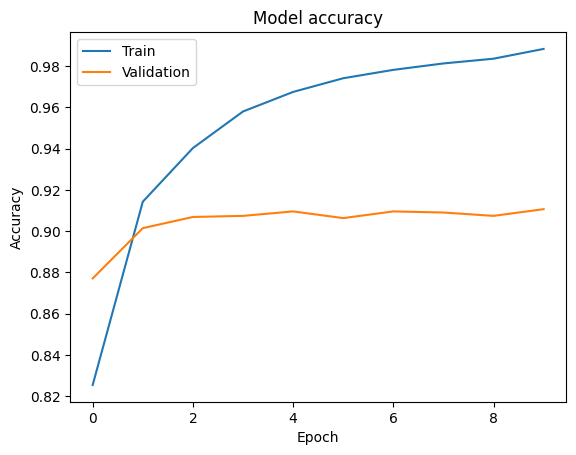

In [32]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('/content/drive/MyDrive/TIE_PROJECT/Graph_Visualizatons/accuracy_plot.png', dpi=300)
plt.show()

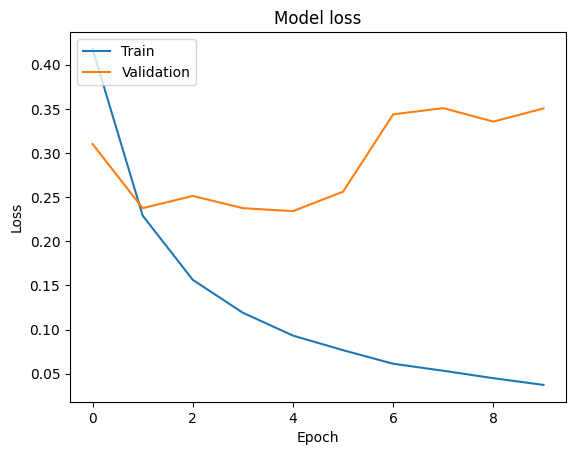

In [33]:
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('/content/drive/MyDrive/TIE_PROJECT/Graph_Visualizatons/loss_plot.png', dpi=300)
plt.show()

# Load Model

In [35]:
model = models.load_model('/content/drive/MyDrive/TIE_PROJECT/sentiment_analysis.h5')
print("Model Loaded")
model.summary()

Model Loaded
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           372352    
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 389003 (1.48 MB)
Trainable params: 389003 (1.48 MB)
Non-trainable params: 0 (0.00 Byte)
_______

In [36]:
score = model.evaluate(padded_sequence_test,sentiment_label_test[0],verbose=0)

# Accuracy

In [37]:
print("Accuracy: {}".format(score[1]))

Accuracy: 0.9211779832839966


# Test Run

In [39]:
import pickle
with open('/content/drive/MyDrive/TIE_PROJECT/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [40]:
len(tokenizer.word_index)

11635

In [41]:
test_word ="""
These masks were a steal! 50 for 12$!! They are soft, breathable, light, comfortable and professional. It doesn’t hurt or irritate my ears and where they glue the straps to the mask isn’t hard and crusty like the basic blue ones. These are great!
"""

tw = tokenizer.texts_to_sequences([test_word])
tw = pad_sequences(tw,maxlen=200)

tw

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [42]:
prediction = int(model.predict(tw).round().item())
outcome = (review_labels_train[1][prediction]).capitalize()

print("Actual Review: " + test_word)
print("\nSentiment Analysis Outcome ==> The review shows " + (review_labels_train[1][prediction]).capitalize() + " sentiment.")
print("\n======================================================================================")

print("\nAccuracy Criteria \n\nProbability Closer to 0 == Negative Sentiment\nProbability Closer to 1 == Positive Sentiment")

prob = model.predict(tw)[0][0]

print("\n ==> Probability is " + str(prob)+ " (" + outcome + ")")

1/1 [==============================] - 1s 664ms/step
Actual Review: 
These masks were a steal! 50 for 12$!! They are soft, breathable, light, comfortable and professional. It doesn’t hurt or irritate my ears and where they glue the straps to the mask isn’t hard and crusty like the basic blue ones. These are great!


Sentiment Analysis Outcome ==> The review shows Positive sentiment.


Accuracy Criteria 

Probability Closer to 0 == Negative Sentiment
Probability Closer to 1 == Positive Sentiment
1/1 [==============================] - 0s 182ms/step

 ==> Probability is 0.9961766 (Positive)
